In [1]:
import tensorflow as tf 
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models 
import tensorflow.keras.optimizers as optim 


import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import random

import warnings 

warnings.filterwarnings("ignore")

train_images = []
test_images = []

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 !unzip "/content/drive/MyDrive/256x256.zip"

Streaming output truncated to the last 5000 lines.
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0077.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0078.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0079.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0080.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0081.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0082.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0083.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0084.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0085.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0086.jpg  
  inflating: 256_objectcategories/256_ObjectCategories/228.triceratops/228_0087.jpg  
  i

In [4]:
path = r'/content/256_ObjectCategories/'

In [5]:
IMG = (256, 256, 3)

In [22]:
def ConvBlock(x, num, filter, alpha=0.1, kernel=3, moment=0.9):
  for i in range(num):
    if i != 0:
      start = x
    x=layers.Conv2D(filter, kernel, padding="same" )(x)
    x=layers.BatchNormalization(momentum=moment)(x)
    if i==0:
      x=layers.LeakyReLU(alpha)(x)
    else:
      x=layers.LeakyReLU(alpha)(x+start)
  return x

def operation(inp, num=6, filter=64, start_kernel=7, kernel=3, moment=0.9, alpha=0.1 , gf=2):
  x = ConvBlock(inp, 1, filter, alpha, kernel, moment)
  for _ in range(num):
      filter = filter*gf
      x = ConvBlock(x, num, filter)
  x = ConvBlock(x, 1, 3)
  return x

def Stegnography(inp1, inp2, num:list=[2,2,2], filter=128, start_kernel=7, kernel=3, moment=0.9, alpha=0.1, gf=2):
    inp1 = layers.Input(inp1)
    encoder = operation(inp1, num[0], filter, start_kernel, kernel, moment, alpha, gf)
    inp2 = layers.Input(inp2)
    x = layers.Concatenate()([inp2, encoder])
    intermediate = operation(x, num[1], filter, start_kernel, kernel, moment, alpha, gf)
    decoder =  operation(intermediate, num[2], filter, start_kernel, kernel, moment, alpha, gf)

    model = models.Model(inputs=[inp1, inp2], outputs=[intermediate, decoder], name="ma_chuda")
    return model

model = Stegnography(IMG,IMG)
model.summary() 





  

Model: "ma_chuda"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_108 (Conv2D)            (None, 256, 256, 12  3584        ['input_5[0][0]']                
                                8)                                                                
                                                                                                  
 batch_normalization_108 (Batch  (None, 256, 256, 12  512        ['conv2d_108[0][0]']             
 Normalization)                 8)                                                         

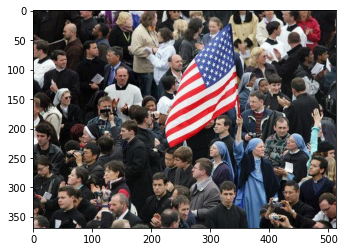

In [7]:
img1 = r"/content/256_ObjectCategories/001.ak47/001_0001.jpg"
img2 = r"/content/256_ObjectCategories/002.american-flag/002_0010.jpg"
plt.imshow(cv2.cvtColor(cv2.imread(img2), cv2.COLOR_BGR2RGB))

In [8]:
# import os
# folders = os.listdir(path)
# VAL = []
# for folder in folders:
#     VALID = []
#     files = os.listdir(path+folder)
#     for file in files[50:70]:
#       VALID.append(cv2.imread(path+folder+"/"+file)/255.0)
#     VAL.append(VALID)

In [6]:
FACTOR = 0.75

In [7]:
import os
folders = os.listdir(path)
IMGS = []
IMG1 = []
for folder in folders:
    IMAGE = []
    files = os.listdir(path+folder)
    for file in files:
      try:
        image = cv2.imread(path+folder+"/"+file)/255.0
        height, width, _ = image.shape
        if FACTOR<=height/width<=(1/FACTOR):
          IMAGE.append(cv2.resize(image, (IMG[0], IMG[1]), cv2.INTER_AREA))
        if len(IMAGE)>14:
          break 
      except:
        pass

    if len(IMAGE)==15:
      IMGS.append(IMAGE)

In [8]:
IMGS = np.array(IMGS)

In [9]:
IMGS.shape

(254, 15, 256, 256, 3)

In [10]:
XIMG = []
XDUM = []
VIMG = []
VDUM = []

for _ in range(1200):
    folder1 = random.randint(0, len(IMGS)-1)
    folder2 = random.randint(0,len(IMGS)-1)
    imp = random.randint(0, 6)
    dum = random.randint(0, 3)
    dumb = IMGS[folder1][imp]
    imp = IMGS[folder2][imp+dum]
  
    inpdum = dumb.reshape(IMG[0],IMG[1],IMG[2])
    inpsex = imp.reshape(IMG[0],IMG[1],IMG[2])
    XIMG.append(inpsex)
    XDUM.append(inpdum)

XDUM = np.array(XDUM)
XIMG = np.array(XIMG)

for _ in range(300):
    folder1 = random.randint(0, len(IMGS)-1)
    folder2 = random.randint(0, len(IMGS)-1)
    imp = random.randint(0, 3)
    dum = random.randint(0, 2)
    dumb = IMGS[folder1][9+imp]
    imp = IMGS[folder2][9+imp+dum]
    inputs = np.concatenate([dumb.reshape(IMG[0], IMG[1], IMG[2]), imp.reshape(IMG[0], IMG[1], IMG[2])], axis = 2)
    inpdum = dumb.reshape(IMG[0], IMG[1], IMG[2])
    inpsex = imp.reshape(IMG[0], IMG[1], IMG[2])
    VIMG.append(inpsex)
    VDUM.append(inpdum)

VDUM = np.array(VDUM)
VIMG = np.array(VIMG)


In [11]:
# model = models.load_model("/content/drive/MyDrive/ujjwalmc256x256pro_18.h5")

In [26]:
for lr, epoch in zip([1e-4], [3]):
  model.compile(loss="mae", optimizer=optim.Adam(learning_rate=lr), metrics=["accuracy"])
  model.fit([XIMG, XDUM], [XDUM, XIMG], epochs=epoch, verbose=1, batch_size = 1, validation_data=[[VIMG, VDUM], [VDUM, VIMG]], validation_batch_size=1)

Epoch 1/3
1200/1200 [==============================] - 118s 90ms/step - loss: 0.2791 - leaky_re_lu_119_loss: 0.1441 - leaky_re_lu_125_loss: 0.1350 - leaky_re_lu_119_accuracy: 0.3677 - leaky_re_lu_125_accuracy: 0.3991 - val_loss: 0.2990 - val_leaky_re_lu_119_loss: 0.1176 - val_leaky_re_lu_125_loss: 0.1814 - val_leaky_re_lu_119_accuracy: 0.4087 - val_leaky_re_lu_125_accuracy: 0.4069
Epoch 2/3
1200/1200 [==============================] - 108s 90ms/step - loss: 0.2779 - leaky_re_lu_119_loss: 0.1435 - leaky_re_lu_125_loss: 0.1344 - leaky_re_lu_119_accuracy: 0.3711 - leaky_re_lu_125_accuracy: 0.4008 - val_loss: 0.2643 - val_leaky_re_lu_119_loss: 0.1150 - val_leaky_re_lu_125_loss: 0.1492 - val_leaky_re_lu_119_accuracy: 0.4069 - val_leaky_re_lu_125_accuracy: 0.4028
Epoch 3/3
1001/1200 [========================>.....] - ETA: 16s - loss: 0.2749 - leaky_re_lu_119_loss: 0.1422 - leaky_re_lu_125_loss: 0.1326 - leaky_re_lu_119_accuracy: 0.3732 - leaky_re_lu_125_accuracy: 0.4025

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'output secret')

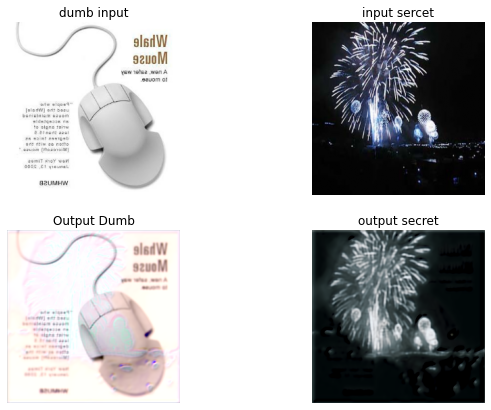

In [30]:
# code for displaying multiple images in one figure
c=115
#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(10, 7))
out1, out2 = model([VDUM[c].reshape(-1, IMG[0], IMG[1], IMG[2]), VIMG[c].reshape(-1, IMG[0], IMG[1], IMG[2])])
# setting values to rows and column variables
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(VIMG[c].reshape(IMG[0], IMG[1], IMG[2]))

plt.axis('off')
plt.title("dumb input")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(VDUM[c].reshape(IMG[0], IMG[1], IMG[2]))
plt.axis('off')
plt.title("input sercet")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(np.array(out1).reshape(IMG[0], IMG[1], IMG[2]))
plt.axis('off')
plt.title("Output Dumb")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(np.array(out2).reshape(IMG[0], IMG[1], IMG[2]))
plt.axis('off')
plt.title("output secret")


In [ ]:
model.save("/content/drive/MyDrive/ujjwalmc256x256pro222_27.h5")